In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)

Dataset : https://www.kaggle.com/datasets/shantanuss/banknote-authentication-uci

In [ ]:
df = pd.read_csv('BankNote_Authentication.csv')
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


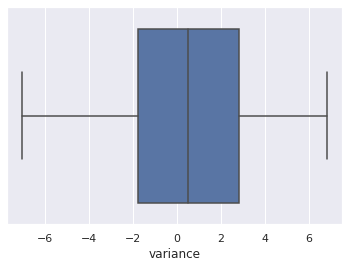

In [ ]:
sns.boxplot(x=df["variance"])

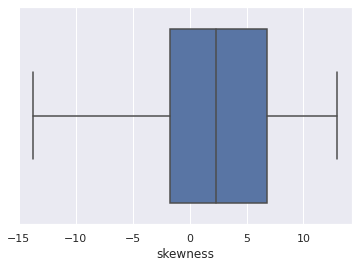

In [ ]:
sns.boxplot(x=df["skewness"])

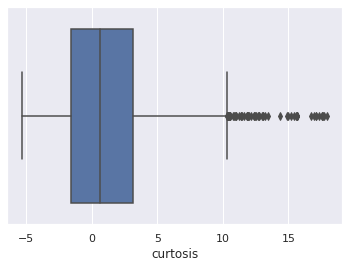

In [ ]:
sns.boxplot(x=df["curtosis"])

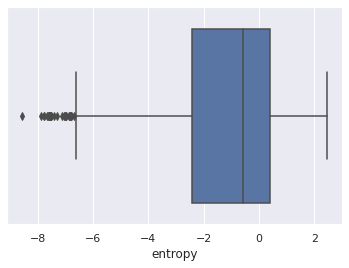

In [ ]:
sns.boxplot(x=df["entropy"])

In [ ]:
import scipy.stats as stats
z = np.abs(stats.zscore(df))
data_clean = df[(z<2).all(axis=1)]
data_clean.shape

(1210, 5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    727
1    483
Name: class, dtype: int64

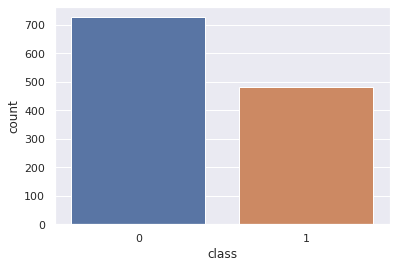

In [ ]:
#Counting 1 and 0 Value in class column
sns.countplot(data_clean['class'])
data_clean['class'].value_counts()

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = data_clean[(data_clean['class']==0)] 
df_minority = data_clean[(data_clean['class']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 727, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
data_clean2 = pd.concat([df_minority_upsampled, df_majority])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    727
0    727
Name: class, dtype: int64

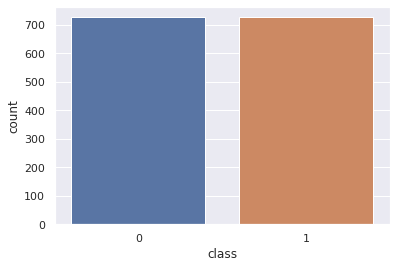

In [ ]:
#Counting 1 and 0 Value in class column
sns.countplot(data_clean2['class'])
data_clean2['class'].value_counts()

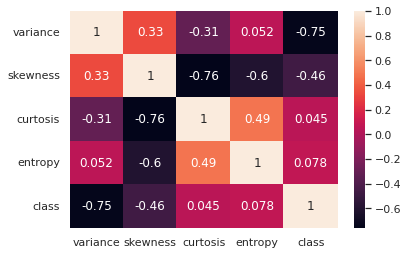

In [ ]:
sns.heatmap(data_clean2.corr(), annot=True)

In [ ]:
X = data_clean2.drop('class', axis=1)
y = data_clean2['class']
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
from sklearn.metrics import accuracy_score

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 98.97 %


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 99.31 %


#XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier()

In [ ]:
y_pred = xgb.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 99.31 %


#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 98.97 %


#Visualize XGBoost

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

Text(0.5, 1.0, 'Accuracy Score: 99.3127147766323')

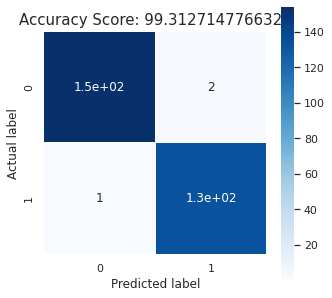

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(xgb.score(X_test, y_test)*100)
plt.title(all_sample_title, size = 15)

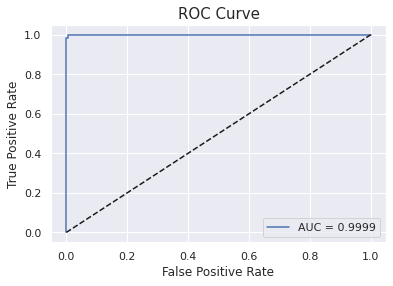

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = xgb.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

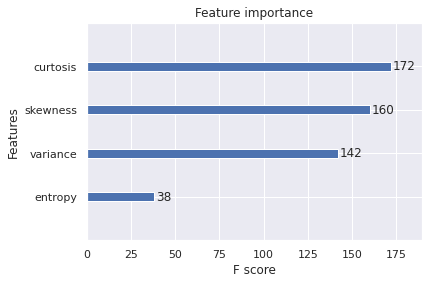

<Figure size 2160x3240 with 0 Axes>

In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(xgb)
plt.figure(figsize=(30,45))
pyplot.show()

In [ ]:
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train,y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

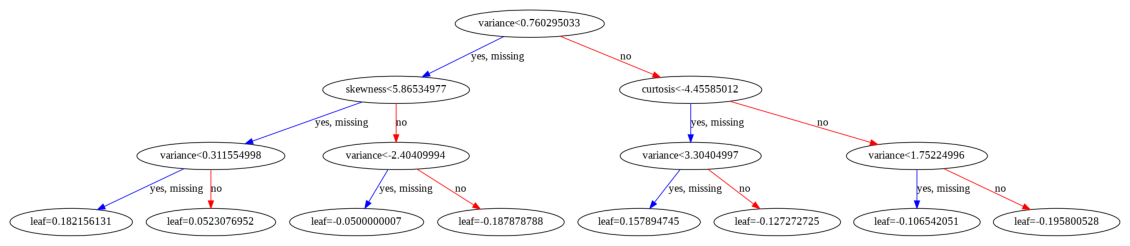

In [ ]:
import xgboost as xgb
plt.figure(figsize=(20,20))
xgb.plot_tree(model, ax=plt.gca());